# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [190]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [191]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [192]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [193]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In the given data, columns preg and class can have 0's. The other columns plas(plasma glucose),pres(Blood pressure),skin(skin thickness),test(Insulin),mass(BMI),pedi(Diabetes Pedigree Function) and age cannot have 0's. Hence replacing 0's in these columns with medians of the respective median values.

In [194]:
pima_df.loc[pima_df['plas'] == 0,'plas'] = pima_df.median()['plas']
pima_df.loc[pima_df['pres'] == 0,'pres'] = pima_df.median()['plas']
pima_df.loc[pima_df['skin'] == 0,'skin'] = pima_df.median()['skin']
pima_df.loc[pima_df['test'] == 0,'test'] = pima_df.median()['test']
pima_df.loc[pima_df['mass'] == 0,'mass'] = pima_df.median()['mass']
pima_df.loc[pima_df['pedi'] == 0,'pedi'] = pima_df.median()['pedi']

# Q5 Print the descriptive statistics of each & every column using describe() function

In [195]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,74.437500,15.262202,24.000,64.00000,73.0000,82.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [196]:
pima_df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


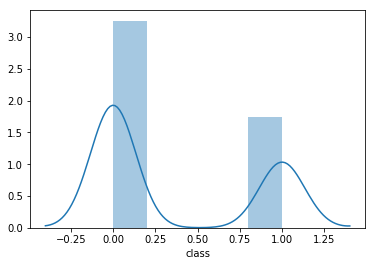

In [197]:
## distribution plot
sns.distplot(pima_df['class'])

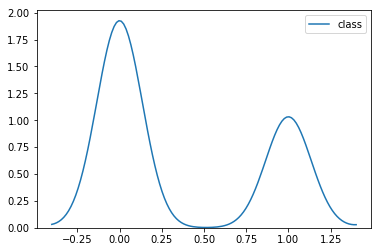

In [198]:
# Density Plot
sns.kdeplot(pima_df['class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


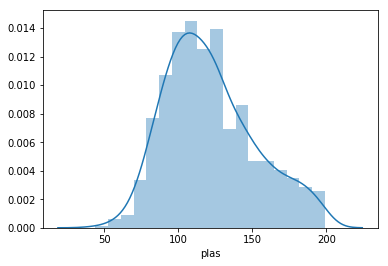

In [199]:
sns.distplot(pima_df['plas'])

# From the below distribution it can be seen that plasma glucose values are almost normal with a slight thick right tail

C:\Users\gopin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


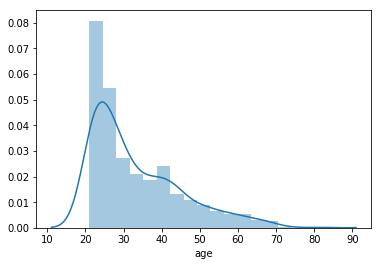

In [200]:
sns.distplot(pima_df['age'])

# From the below distribution it can be seen that the age data is right skewed with outliers on the right hand side.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gopin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


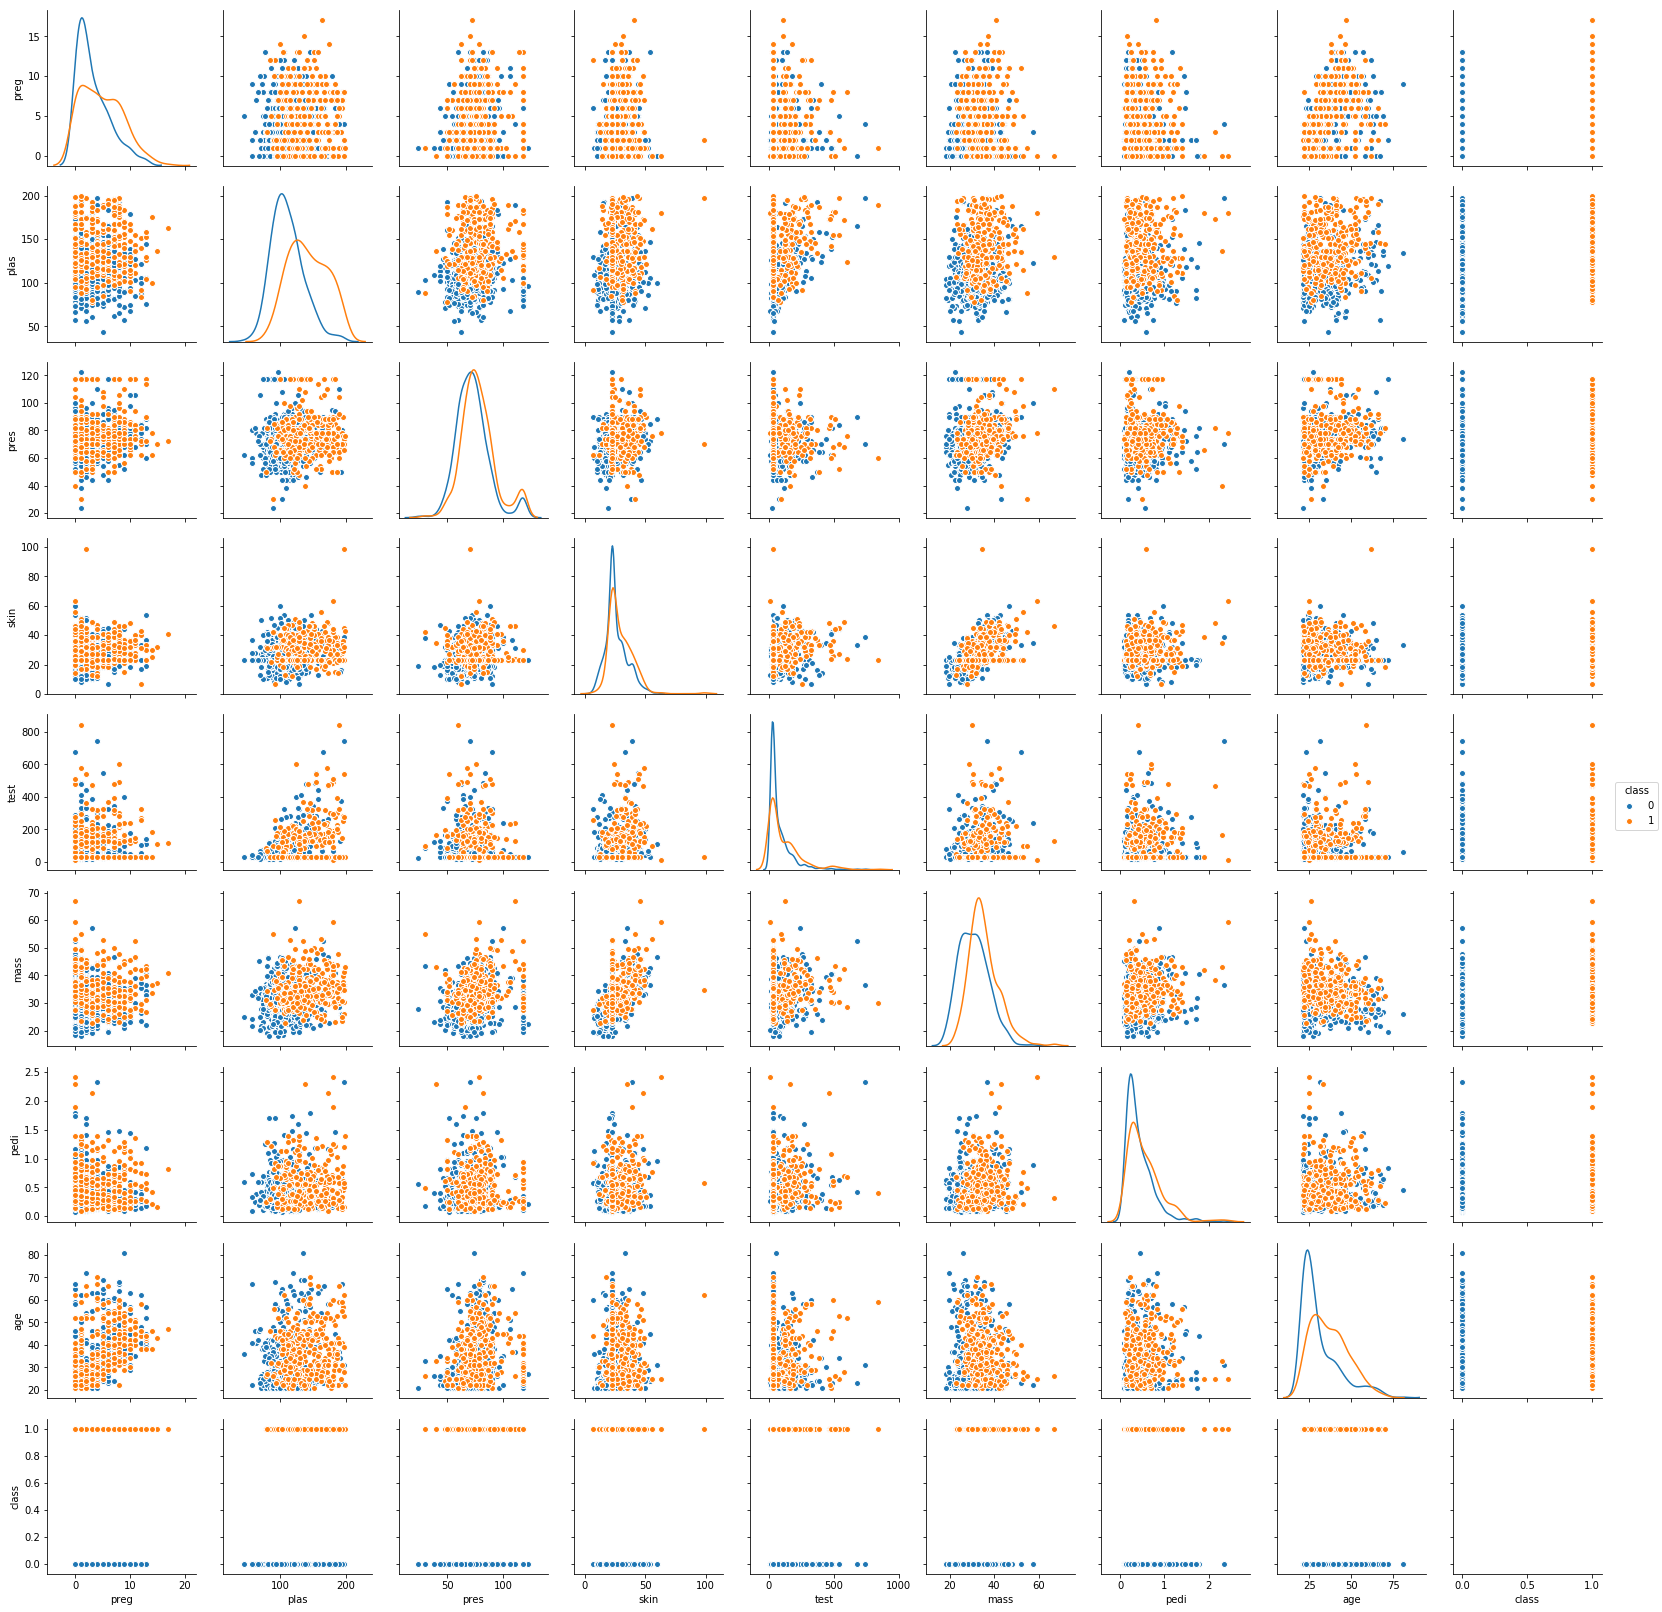

In [201]:
# Plotting the pair plot
sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')

From the above pair plots, it can be seen that relationship between the class variable and the variables pedi,skin,test and pres seems to be very minimal. These variables will not aid much in classifying the class colums.

In [202]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.128213,0.156702,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
plas,0.128213,1.000000,0.156481,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.156702,0.156481,1.000000,0.056875,-0.104541,0.216067,-0.035771,0.228618,0.161868
skin,0.032568,0.172143,0.056875,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.104541,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.216067,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.035771,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.228618,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.161868,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


From the above correlation matrix, below observations can be made:

1) There is a positive correlation between preg and age columns (which can be explained as pregnancy is generally seen in a certain age group)     
2) There is a positibe correlation between skin and mass columns (which can be explaind as high skin thickness means more weight which leads to BMI)    
3) There is a positive correlation between plas (plasma glucose) and class columns (not too strong though)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [203]:
X = pima_df.drop('class', axis=1) 
Y = pima_df['class']
test_size = 0.30 # taking 70:30 training and test set
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

#X_train.shape
#X_test.shape
#y_train.shape
#y_test.shape

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [204]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [205]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [208]:
dt_accuracy = dt_model.score(X_test , y_test) ## performance on the test data
print(f'Accuraccy of the decision tree model: {dt_accuracy}')

Accuraccy of the decision tree model: 0.7272727272727273


In [209]:
y_pred = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[116  31]
 [ 32  52]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       147
           1       0.63      0.62      0.62        84

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



Print the feature importance of the decision model - Optional

In [210]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ['class'], index = X_test.columns))

         class
preg  0.086744
plas  0.266685
pres  0.124214
skin  0.074967
test  0.039480
mass  0.175791
pedi  0.106178
age   0.125941


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [211]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5) ## limiting the depth to 5 nodes

In [212]:
Rf_model.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [219]:
rf_accuracy = Rf_model.score(X_test , y_test) ## performance on the test data
print(f'Accuraccy of the random forest model: {rf_accuracy}')

Accuraccy of the random forest model: 0.922077922077922


In [214]:
y_pred_rf = Rf_model.predict(X_test)

In [215]:
print(metrics.confusion_matrix(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

[[141   6]
 [ 12  72]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       147
           1       0.92      0.86      0.89        84

   micro avg       0.92      0.92      0.92       231
   macro avg       0.92      0.91      0.91       231
weighted avg       0.92      0.92      0.92       231



# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [216]:
abcl = AdaBoostClassifier() # default no. of estimators

In [217]:
abcl.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [220]:
abcl_accuracy = abcl.score(X_test,y_test)
print(f'Accuraccy of the Adaboost model: {abcl_accuracy}')

Accuraccy of the Adaboost model: 0.7619047619047619


In [221]:
y_pred_abcl =abcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_abcl))
print(metrics.classification_report(y_test, y_pred_abcl))

[[118  29]
 [ 26  58]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       147
           1       0.67      0.69      0.68        84

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.76      0.76      0.76       231



# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [222]:
bgcl = BaggingClassifier(max_samples= .7, bootstrap=True, oob_score=True) # default no.of estimators

In [223]:
bgcl.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.7,
         n_estimators=10, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [224]:
bgcl_accuracy = bgcl.score(X_test,y_test)
print(f'Accuraccy of the Bagging Classifier Algorithm: {bgcl_accuracy}')

Accuraccy of the Bagging Classifier Algorithm: 0.7316017316017316


In [225]:
y_pred_bgcl =bgcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_bgcl))
print(metrics.classification_report(y_test, y_pred_bgcl))

[[123  24]
 [ 38  46]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       147
           1       0.66      0.55      0.60        84

   micro avg       0.73      0.73      0.73       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [226]:
gbcl = GradientBoostingClassifier() # default no. of estimators

In [227]:
gbcl.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [229]:
gbcl_accuracy = gbcl.score(X_test,y_test)
print(f'Accuraccy of the Gradient Boost Classification Algorithm: {gbcl_accuracy}')

Accuraccy of the Gradient Boost Classification Algorithm: 0.7748917748917749


In [230]:
y_pred_gbcl =gbcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_gbcl))
print(metrics.classification_report(y_test, y_pred_gbcl))

[[122  25]
 [ 27  57]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       147
           1       0.70      0.68      0.69        84

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.77      0.77      0.77       231



# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [232]:
vcl = VotingClassifier(estimators=[('dt', dt_model), ('rf', Rf_model), ('adaboost', abcl),('bagging', bgcl),('gradient', gbcl)], voting='hard')

In [233]:
vcl.fit(X_train,y_train)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_l...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [234]:
vcl_accuracy = vcl.score(X_test,y_test)
print(f'Accuraccy of the Voting Classifier: {vcl_accuracy}')

Accuraccy of the Voting Classifier: 0.7748917748917749


In [235]:
y_pred_vcl =vcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_vcl))
print(metrics.classification_report(y_test, y_pred_vcl))

[[122  25]
 [ 27  57]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       147
           1       0.70      0.68      0.69        84

   micro avg       0.77      0.77      0.77       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.77      0.77      0.77       231



Voting Classifier accuracy is naturally high as it classifies based on the majority in the base estimators